In [2]:
# Import packages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

import warnings
warnings.filterwarnings('ignore')

/home/dadjei2/miniforge/envs/climate/lib/python3.12/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
# load data and open data
data = xr.open_dataset('/home/dadjei2/CLIM680/Assignments/Africa_cru_data.nc')
data

<xarray.Dataset> Size: 378MB
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 126MB ...
    stn      (time, lat, lon) float64 252MB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [6]:
# subset precipitation data
ds_precip = data.pre
ds_precip

# subset 30 years of precipitation data (1990)
ds_30_years = ds_precip.sel(time=slice('1990-01-01', '2019-12-31'))
ds_30_years

# group data to yearly data
# da_precip = ds_30_years.groupby('time.year').mean()
# da_precip

<xarray.DataArray 'pre' (time: 360, lat: 146, lon: 150)> Size: 32MB
[7884000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 3kB 1990-01-16 1990-02-15 ... 2019-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [7]:
# compute climatology of monthly average precipitation
# monthly_clim = ds_30_years.resample(time='M').mean()

# Compute the monthly mean precipitation
monthly_clim = ds_30_years.groupby('time.month').mean() 

# rename months and assign to re-assign to the datarray
name_month = ['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September','October', 'November', 'December']
monthly_clim['month'] = xr.DataArray(name_month, dims='month')

monthly_clim

<xarray.DataArray 'pre' (month: 12, lat: 146, lon: 150)> Size: 1MB
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ..., 20.336668, 23.220001,
         25.323336],
        [      nan,       nan,       nan, ..., 18.910002, 20.006666,
         19.933336],
        [      nan,       nan,       nan, ...,       nan, 20.273333,
         20.03667 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [      nan,       nan,       nan, ..., 19.203333, 16.983334,
         14.326665],
        [      nan,       nan,       nan, ..., 23.236664, 21.973333,
         20.396666],
        [      nan,       nan,       nan, ...,       nan, 24.406668,
         23.016665]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ..., 19.713335, 18.67    ,
         18.323332],
        [      nan,       nan,       nan, ..., 19.383335, 19.356667,
         18.179998],
        [      nan,       nan,       nan, ...,       nan, 19.653337,
         18.700003]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * month    (month) <U9 432B 'January' 'February' ... 'November' 'December'
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

### Plot Climatology of Monthly Precipitation

Text(0.5, 0.98, 'Climatology of Monthly Average Precipitation in Africa')

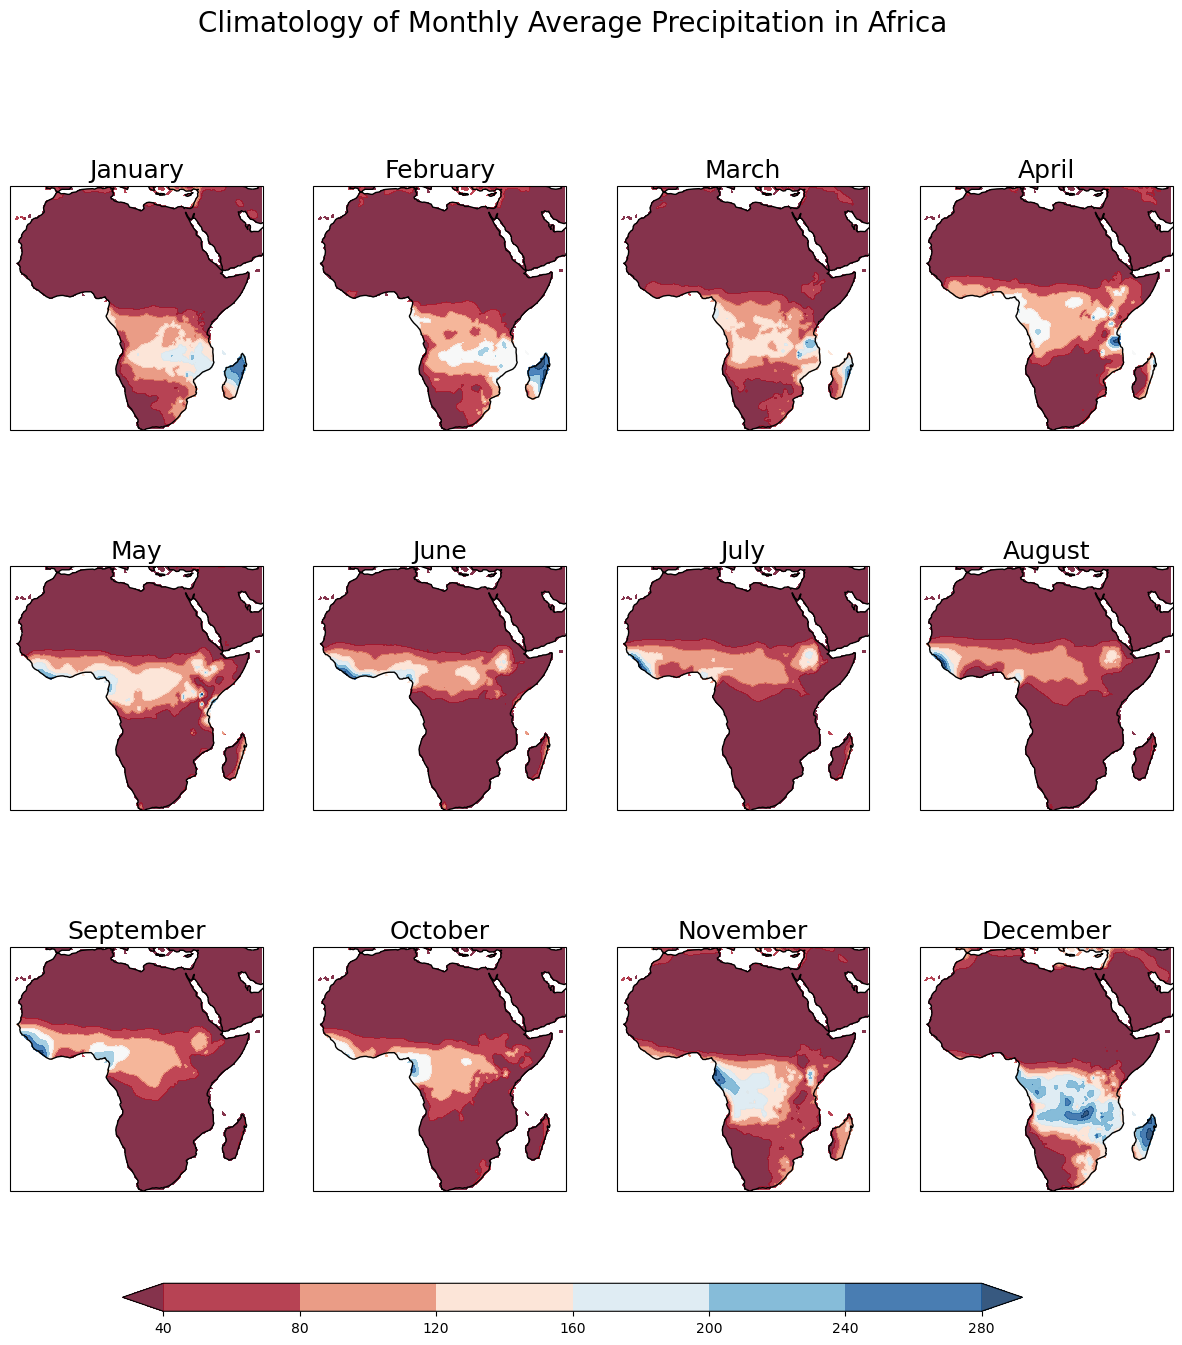

In [19]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=3,ncols=4,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(15,14))
# clevs=np.arange(-3,3.5,0.5)

# axs is a 2 dimensional array of `GeoAxes`.  
# Flatten 2D array into a 1-D array
axs=axs.flatten()

#Loop over all of the months and plot
for i,mon in enumerate(monthly_clim['month']):

    # Select the month
    data_1=monthly_clim.sel(month=mon)
    

    # Add the cyclic point
    data_1,lons=add_cyclic_point(data_1,coord=monthly_clim['lon'])

    # Contour plot
    cs=axs[i].contourf(lons,monthly_clim['lat'],
                       data_1,
                       # clevs,
                      transform = ccrs.PlateCarree(),
                      cmap='RdBu',extend='both', alpha=0.8)

    # Title each subplot with the name of the model
    axs[i].set_title(mon.values, fontsize=18)

    # Draw the coastines for each subplot
    axs[i].coastlines()
    # axs[i].add_feature(feature.BORDERS)
    
# Adjust the location of the subplots 
# on the page to make room for the colorbar
# fig.subplots_adjust(bottom=0.25, top=0.9, left=0.15, right=0.95,
#                     wspace=0.2, hspace=0.25)
    
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')#,label='mm')

plt.suptitle('Climatology of Monthly Average Precipitation in Africa', fontsize=20)


### Compute Climatology of Yearly Average Precipitation

In [15]:
# Compute annual precipitation climatology
ds_yearly = ds_30_years.groupby('time.year').mean('time')
ds_yearly

<xarray.DataArray 'pre' (year: 30, lat: 146, lon: 150)> Size: 3MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ..., 10.391667 ,
         11.641666 , 12.266666 ],
        [       nan,        nan,        nan, ..., 11.058334 ,
         10.408332 ,  9.841667 ],
        [       nan,        nan,        nan, ...,        nan,
         12.783333 , 12.400001 ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ..., 10.441667 ,
         12.841668 , 14.3166685],
        [       nan,        nan,        nan, ..., 11.125    ,
         10.375    , 10.716666 ],
        [       nan,        nan,        nan, ...,        nan,
         11.491666 , 12.099999 ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ..., 11.016666 ,
         13.549999 , 15.775002 ],
        [       nan,        nan,        nan, ..., 12.400001 ,
         12.075001 , 12.358335 ],
        [       nan,        nan,        nan, ...,        nan,
         14.224999 , 14.858334 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * year     (year) int64 240B 1990 1991 1992 1993 1994 ... 2016 2017 2018 2019
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

Text(0.5, 0.98, 'Climatology of Yealy Average Precipitation in Africa')

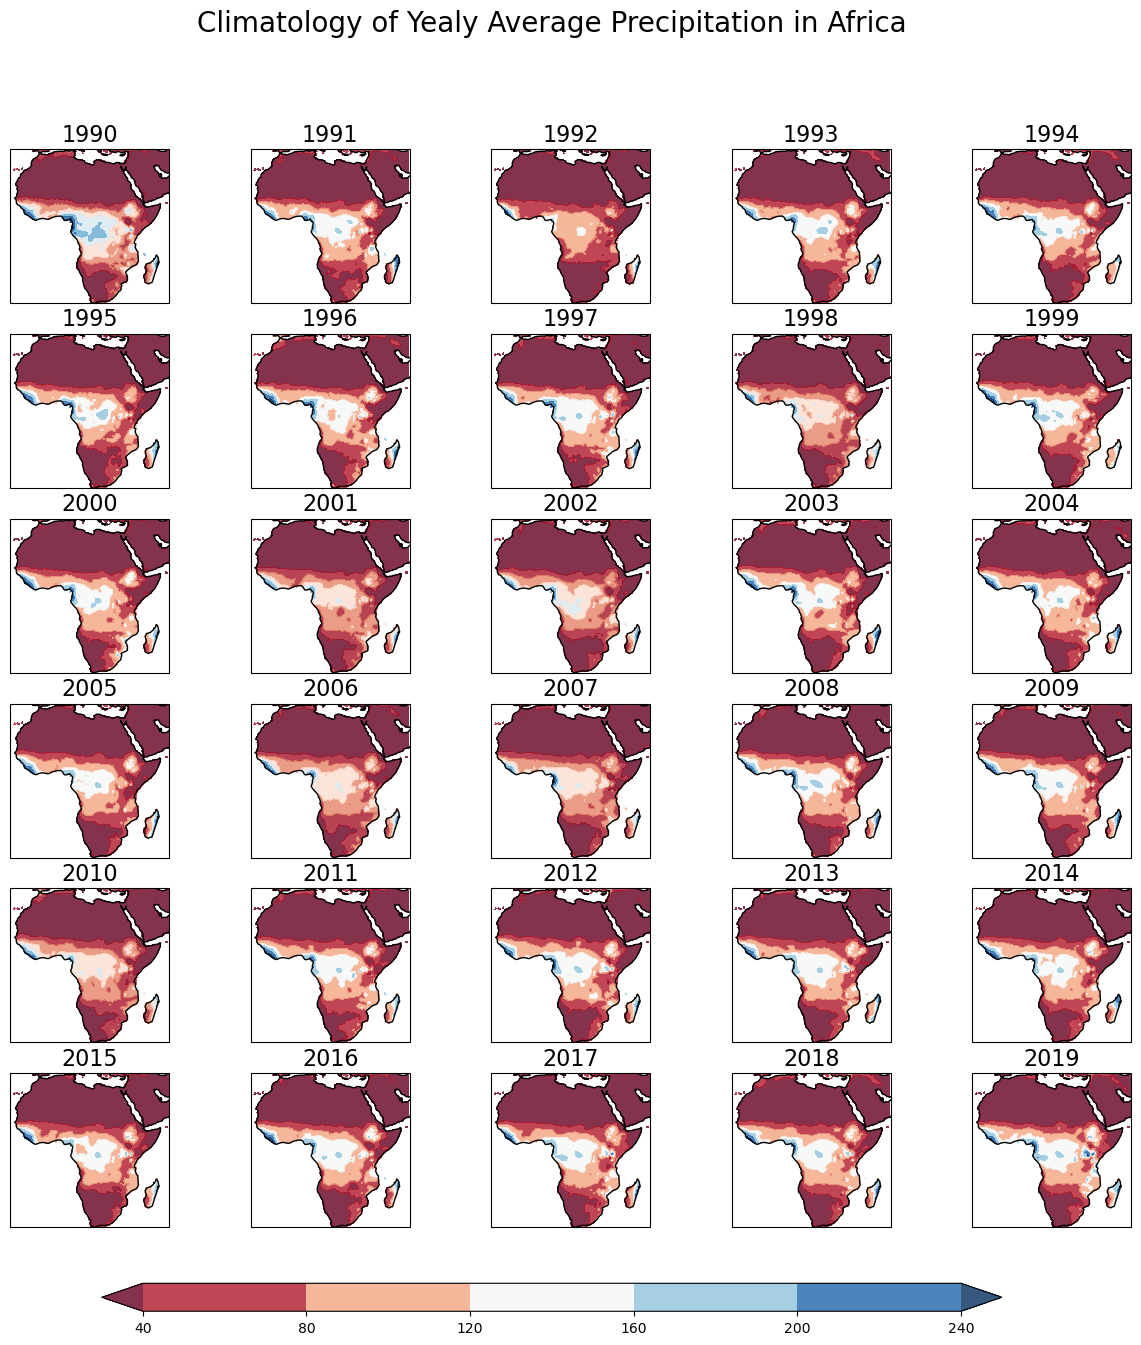

In [18]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=6,ncols=5,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(15,14))

# axs is a 2 dimensional array of `GeoAxes`.  
# Flatten 2D array into a 1-D array
axs=axs.flatten()

#Loop over all of the years and plot
for i,yr in enumerate(ds_yearly['year']):

    # Select the year
    data_1=ds_yearly.sel(year=yr)
    

    # Add the cyclic point
    data_1,lons=add_cyclic_point(data_1,coord=ds_yearly['lon'])

    # Contour plot
    cs=axs[i].contourf(lons,ds_yearly['lat'],
                       data_1,
                       # clevs,
                      transform = ccrs.PlateCarree(),
                      cmap='RdBu',extend='both', alpha= 0.8)

    # Title each subplot with the name of the model
    axs[i].set_title(yr.values, fontsize=16)

    # Draw the coastines for each subplot
    axs[i].coastlines()
    # axs[i].add_feature(feature.BORDERS)
    
# Adjust the location of the subplots 
# on the page to make room for the colorbar
# fig.subplots_adjust(bottom=0.25, top=0.9, left=0.15, right=0.95,
#                     wspace=0.2, hspace=0.25)
    
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')#,label='mm')

plt.suptitle('Climatology of Yealy Average Precipitation in Africa', fontsize=20)


In [61]:
# ds_30_years = ds_precip.sel(time=slice('1990-01-01', '2019-12-31'))
# ds_30_years
# ds_30_years = ds_yearly.sel(year=slice(1990, 2019))
# ds_30_years

In [20]:
ds_mean = ds_30_years.mean('time')
ds_mean

<xarray.DataArray 'pre' (lat: 146, lon: 150)> Size: 88kB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 12.707779 , 15.105275 ,
        16.629438 ],
       [       nan,        nan,        nan, ..., 13.202222 , 12.9850025,
        12.735837 ],
       [       nan,        nan,        nan, ...,        nan, 14.856947 ,
        14.7625065]], dtype=float32)
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75

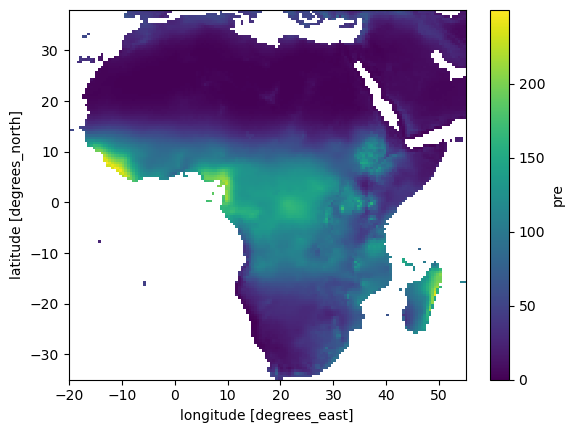

In [125]:
ds_mean.plot()

Rainfall Anomaly Index (RAI) Function

In [ ]:
# A function to compute the RAI
def rai (ds_precip, dimension, method ='ordinary'):
    ds_mean = ds_precip.mean(dimension) #compute the mean

    #computing the anomaly of the data
    ds_anom = ds_precip - ds_mean
    
    if method.lower() == 'ordinary':
        thresh = ds_precip.reduce(np.sort, dim=dimension)
        ds_low_10 = thresh[:10].mean(dimension)
        ds_high_10 = thresh[:-10:-1].mean(dimension)
        
    negative = -3*( (ds_anom.where(ds_anom < 0))/ (ds_low_10 - ds_mean) )
    positive = 3*( (ds_anom.where(ds_anom > 0))/ (ds_high_10 - ds_mean) )

    RAI = ds_anom.where(ds_anom>=0, negative).where(ds_anom<0, positive)
        
    return RAI
    

In [23]:
# Compute RAI on an annual basis using the rai function
RAI_year = rai(ds_yearly, 'year', 'ordinary')
RAI_year

<xarray.DataArray 'pre' (year: 30, lat: 146, lon: 150)> Size: 3MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., -2.5066638 ,
         -3.092255  , -3.4327545 ],
        [        nan,         nan,         nan, ..., -2.3779383 ,
         -2.8471465 , -3.136364  ],
        [        nan,         nan,         nan, ...,         nan,
         -1.9382899 , -2.2565665 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ..., -2.452551  ,
         -2.0209138 , -1.8197567 ],
        [        nan,         nan,         nan, ..., -2.3039944 ,
         -2.8839774 , -2.1881406 ],
        [        nan,         nan,         nan, ...,         nan,
         -3.1456637 , -2.5431156 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., -1.8302443 ,
         -1.3885276 , -0.67230034],
        [        nan,         nan,         nan, ..., -0.88980067,
         -1.0055236 , -0.40908954],
        [        nan,         nan,         nan, ...,         nan,
         -0.59070534,  0.09109529]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * year     (year) int64 240B 1990 1991 1992 1993 1994 ... 2016 2017 2018 2019

### Plot RAI Analysis For Each Year

Text(0.5, 0.98, 'Rainfall Anomaly Index (RAI) over Africa')

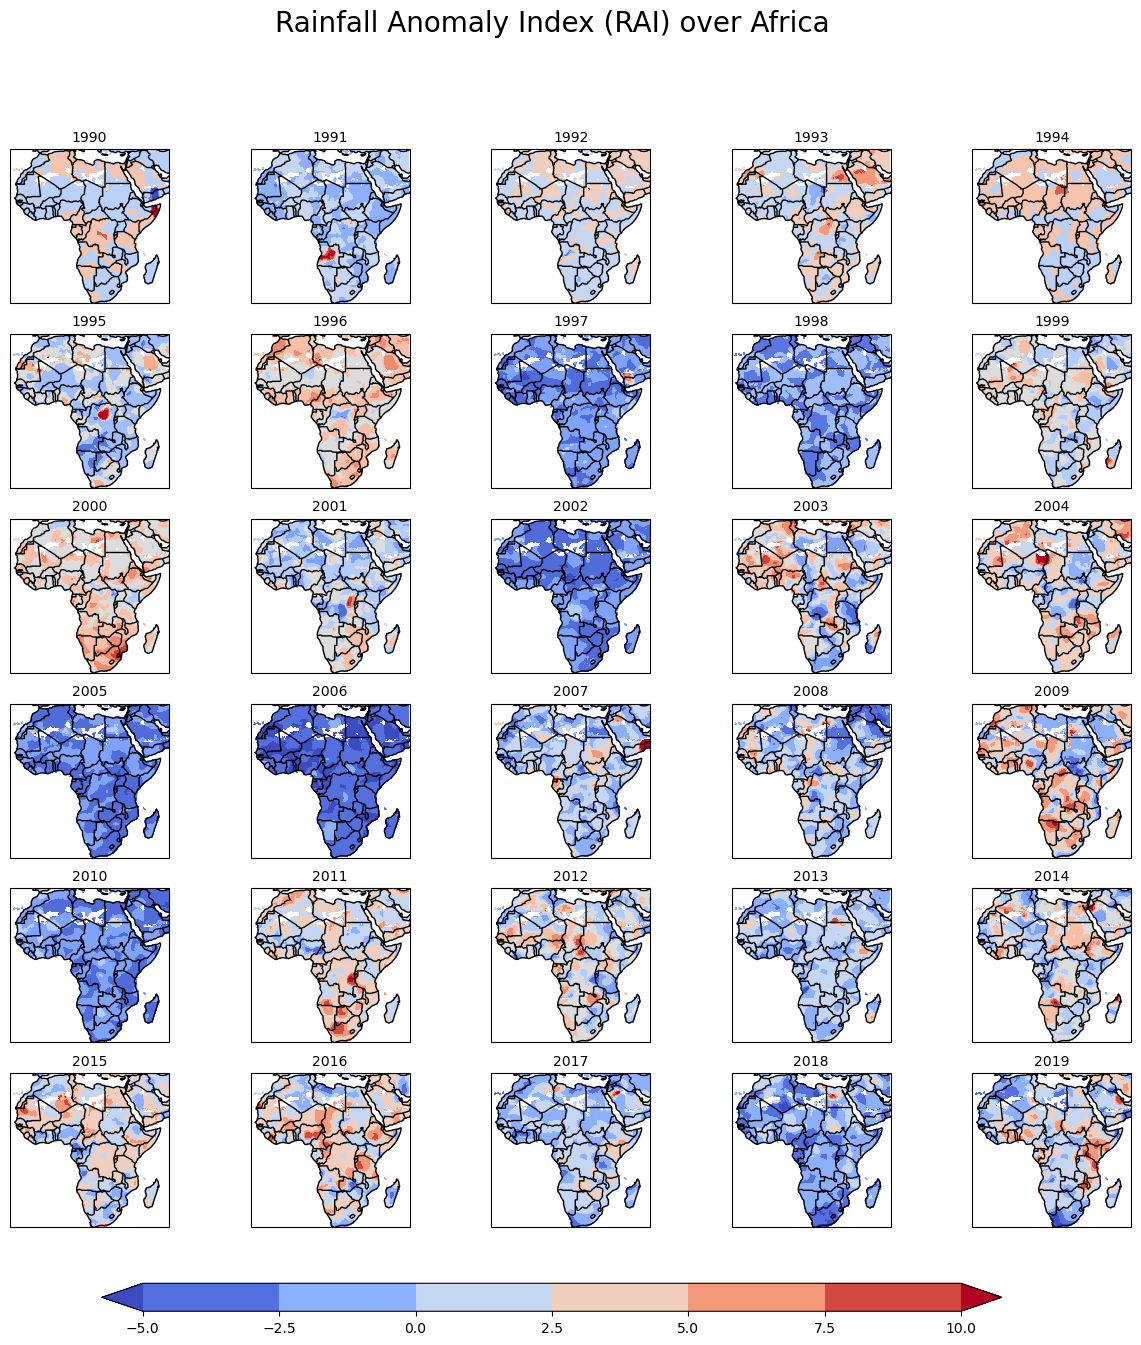

In [25]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=6,ncols=5,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(15,14))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,yr in enumerate(RAI_year['year']):

    # Select the season
    data_1=RAI_year.sel(year=yr)

    # Add the cyclic point
    data_1,lons=add_cyclic_point(data_1,coord=RAI_year['lon'])

    # Contour plot
    cs=axs[i].contourf(lons,RAI_year['lat'],
                       data_1,
                       # clevs,
                      transform = ccrs.PlateCarree(),
                      cmap='coolwarm',extend='both')

    # Title each subplot with the name of the model
    axs[i].set_title(yr.values, fontsize=10)

    # Draw the coastines for each subplot
    axs[i].coastlines()
    axs[i].add_feature(feature.BORDERS)
    
# Adjust the location of the subplots 
# on the page to make room for the colorbar
# fig.subplots_adjust(bottom=0.25, top=0.9, left=0.15, right=0.95,
#                     wspace=0.2, hspace=0.25)
    
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')#,label='mm')

plt.suptitle('Rainfall Anomaly Index (RAI) over Africa', fontsize=20)


<!--  -->

Plotting the nino34 index data
---

In [117]:
# nino34_1982-2019.oisstv2_anoms.nc
ds_nino34 = xr.open_dataset('nino34_1982-2019.oisstv2_anoms.nc')
ds_nino34
# nino34_1982-2019.oisstv2_anoms.nc


<xarray.Dataset> Size: 9kB
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 4kB ...
Data variables:
    sst      (time) float32 2kB ...

In [118]:
ds_nino34 = ds_nino34.sel(time=slice('1990-01-01','2019-12-31'))
ds_nino34

<xarray.Dataset> Size: 7kB
Dimensions:  (time: 360)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1990-01-01 1990-02-01 ... 2019-12-01
    month    (time) int64 3kB ...
Data variables:
    sst      (time) float32 1kB ...

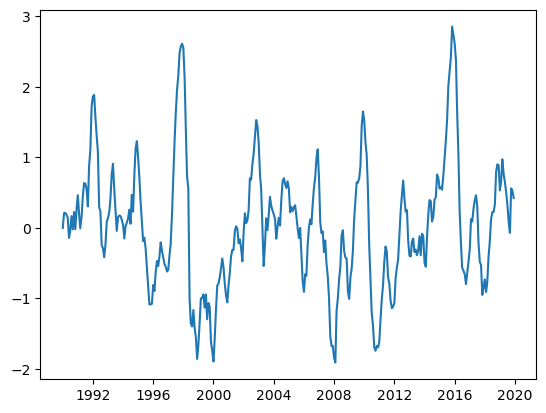

In [119]:
plt.plot(ds_nino34['time'], ds_nino34['sst'])

In [25]:
# ds_30_years

El Nino:  41
Neutral:  274
La Nina:  45
[array(41), array(45), array(274)]


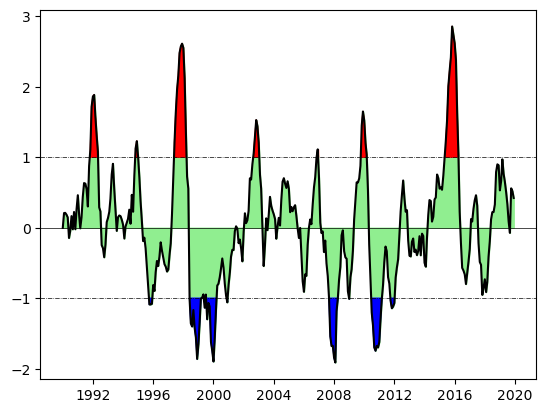

In [120]:
# Define El-Nino, La nina and neutral phases
wet_years = RAI_year.sel(time=rai_values > 2)


elnino=ds_nino34['sst'].where(ds_nino34['sst']>=1)
lanina=ds_nino34['sst'].where(ds_nino34['sst']<=-1)
# neutral=ds_nino34['sst'].where(np.logical_and(ds_nino34['sst']>-1,
#                                               ds_nino34['sst']<1))

# Alternative to deducing the neutral
neutral = ds_nino34['sst'].where((ds_nino34['sst']>-1) & (ds_nino34['sst']<1))

print('El Nino: ',elnino.count(dim='time').values)
print('Neutral: ',neutral.count(dim='time').values)
print('La Nina: ',lanina.count(dim='time').values)

counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        neutral.count(dim='time').values]
print(counts)

plt.plot(ds_nino34['time'],ds_nino34['sst'],'k')
plt.fill_between(ds_nino34['time'].values,ds_nino34['sst'],color='lightgreen')
plt.fill_between(ds_nino34['time'].values,elnino,y2=1.0,color='red')
plt.fill_between(ds_nino34['time'].values,lanina,y2=-1.0,color='blue')
plt.axhline(0,color='black',linewidth=0.5)
plt.axhline(1,color='black',linewidth=0.5,linestyle='dashdot')#'dotted')
plt.axhline(-1,color='black',linewidth=0.5,linestyle='dashdot')#'dotted') ;

In [ ]:
# 
da_RAI = RAI_year.sel(time=slice(ds_nino34['time'][0],ds_nino34['time'][-1]))

da_mean = da_RAI.groupby('time.month').mean()
da_anoms = da_RAI.groupby('time.month')-da_mean

### Selecting dates that match each phase of ENSO

In [61]:
elnino_sst = da_anoms.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
lanina_sst = da_anoms.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
neutral_sst = da_anoms.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')

comp_precip = [elnino_sst,lanina_sst,neutral_sst]
# comp_precip

KeyError: "not all values found in index 'time'"

### Composite for RAI

In [36]:
wet_years = RAI_year.where(RAI_year.values > 2)
dry_years =  RAI_year.where(RAI_year.values < 2)

In [35]:
RAI_year

<xarray.DataArray 'pre' (year: 30, lat: 146, lon: 150)> Size: 3MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., -2.5066638 ,
         -3.092255  , -3.4327545 ],
        [        nan,         nan,         nan, ..., -2.3779383 ,
         -2.8471465 , -3.136364  ],
        [        nan,         nan,         nan, ...,         nan,
         -1.9382899 , -2.2565665 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ..., -2.452551  ,
         -2.0209138 , -1.8197567 ],
        [        nan,         nan,         nan, ..., -2.3039944 ,
         -2.8839774 , -2.1881406 ],
        [        nan,         nan,         nan, ...,         nan,
         -3.1456637 , -2.5431156 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., -1.8302443 ,
         -1.3885276 , -0.67230034],
        [        nan,         nan,         nan, ..., -0.88980067,
         -1.0055236 , -0.40908954],
        [        nan,         nan,         nan, ...,         nan,
         -0.59070534,  0.09109529]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * year     (year) int64 240B 1990 1991 1992 1993 1994 ... 2016 2017 2018 2019

In [ ]:
elnino=ds_nino34['sst'].where(ds_nino34['sst']>=1)
